# Export Required Libraries 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from geopy.geocoders import Nominatim

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
from bs4 import BeautifulSoup

# Introduction
Tourists find it difficult to select the optimal locations for their Hotels. They would like to select locations that are nearby attraction areas, safe to stay and walk in as well as near to famous restaurants and transportations. In this project, we will analyze and cluster Chicago city based on tourism attractions, crime rates, public transportations and famous restaurants. Then, we will provide recommendations on the top best hotel locations that optimizes tourists’ needs and requirements. 


# Data acquisition and cleaning
## Data sources
In this section, the data used to solve the above problem are described as follow:
1.	Chicago Crime Data to determine the crime rate at different Chicago areas
2.	Top attractions and restaurants acquired from FourSqaure website
3.	Within the top attractions, find the top restaurants, transportations and hotels and their geographical locations 

### Crime Data
This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days (source:https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv )

### FourSquare Data

We will use the FourSquare website to request the top 50 sites in Chicago and then use BeautifulSoup to scrape the data

### Top restaurants, transportations and hotels

After getting the top 50 cites in Chicago, we will find category restaurants, transportations and hotels 





## Data cleaning

In [3]:
DF_Crime= pd.read_csv("https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv");
DF_Crime.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


### Check the content of the crime data

In [4]:
list(DF_Crime.columns) 

['ID',
 'CASE_NUMBER',
 'DATE',
 'BLOCK',
 'IUCR',
 'PRIMARY_TYPE',
 'DESCRIPTION',
 'LOCATION_DESCRIPTION',
 'ARREST',
 'DOMESTIC',
 'BEAT',
 'DISTRICT',
 'WARD',
 'COMMUNITY_AREA_NUMBER',
 'FBICODE',
 'X_COORDINATE',
 'Y_COORDINATE',
 'YEAR',
 'UPDATEDON',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION']

### Extract only the data of interests 

In [36]:
Crime_Columns_Interest = ['DATE', 'BLOCK','PRIMARY_TYPE','DISTRICT','WARD','COMMUNITY_AREA_NUMBER','YEAR','LATITUDE','LONGITUDE'];

In [37]:
DF_Crime= DF_Crime[Crime_Columns_Interest]
DF_Crime=DF_Crime[DF_Crime['YEAR'] >= 2009]
DF_Crime = DF_Crime.dropna(how='any',axis=0)
DF_Crime.head()

,DATE,BLOCK,PRIMARY_TYPE,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,YEAR,LATITUDE,LONGITUDE
0,04/04/2011 05:45:00 AM,043XX S WABASH AVE,THEFT,2,3.0,38.0,2011,41.815933,-87.624642
1,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,THEFT,4,7.0,46.0,2010,41.743665,-87.562463
2,02/02/2016 07:30:00 PM,033XX W 66TH ST,THEFT,8,15.0,66.0,2016,41.773455,-87.706480
3,09/29/2010 07:59:00 AM,006XX W CHICAGO AVE,THEFT,12,27.0,24.0,2010,41.896447,-87.644939
4,11/30/2016 01:15:00 AM,050XX N KEDZIE AVE,THEFT,17,33.0,14.0,2016,41.972845,-87.708600


## FourSquare Data

In [7]:
CLIENT_ID = 'NI0EGYNNZJYZEKTUUZUO32HRMSU1MZPNGL4KNMYAMJQZUDQE' # your Foursquare ID
CLIENT_SECRET = 'R03BB0YK2ZUO00CWT2AY1NDW4UYJICPNBZOZC1IQN3ZMXFRI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [8]:
# request the top sites in Chicago
page = requests.get(
    "https://foursquare.com/explore?mode=url&near=Chicago%2C%20IL%2C%20United%20States&nearGeoId=72057594042815334&q=Top%20Picks")

# Convert the HTML response into a BeautifulSoup Object
soup = BeautifulSoup(page.content, 'html.parser')

# Use the BeautifulSoup find_all method to extract each top site venue details.
top_venues = soup.find_all('div', class_='venueDetails')


In [9]:
address = 'Chicago'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)


    

In [10]:
# add markers to map
for lat, lng, primary_type in zip(DF_Crime['LATITUDE'], DF_Crime['LONGITUDE'], DF_Crime['PRIMARY_TYPE']):
    label = '{}'.format(primary_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

In [99]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius
# This is the FourSquare Category Id for all hotel venues
categoryId = '4bf58dd8d48988d1fa931735'

# create ur1
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId
)
# display URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=NI0EGYNNZJYZEKTUUZUO32HRMSU1MZPNGL4KNMYAMJQZUDQE&client_secret=R03BB0YK2ZUO00CWT2AY1NDW4UYJICPNBZOZC1IQN3ZMXFRI&v=20180605&ll=41.8755616,-87.6244212&radius=10000&limit=500&categoryId=4bf58dd8d48988d1fa931735'

In [100]:
results_Hotels = requests.get(url).json()

In [101]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Extract Hotel Locations

In [102]:
venues_Hotels = results_Hotels['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues_Hotels) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

nearby_venues_hotels = nearby_venues[nearby_venues['categories']=="Hotel"].reset_index()
nearby_venues_hotels 

100 venues were returned by Foursquare.


,index,name,categories,lat,lng
0,0,Chicago Athletic Association,Hotel,41.881625,-87.624942
1,1,JW Marriott Chicago,Hotel,41.879183,-87.633115
2,2,"The Langham, Chicago",Hotel,41.888463,-87.627336
3,3,Virgin Hotels Chicago,Hotel,41.886065,-87.625853
4,4,"Radisson Blu Aqua Hotel, Chicago",Hotel,41.886308,-87.619921
5,5,Hyatt Regency Chicago,Hotel,41.887739,-87.621823
6,6,The Blackstone Hotel,Hotel,41.873343,-87.624765
7,7,Renaissance Chicago Downtown Hotel,Hotel,41.886221,-87.628321
8,8,Hotel Palomar,Hotel,41.891083,-87.627669
9,9,Hilton Chicago,Hotel,41.872591,-87.624726


## Extract Train/Bus Station Locations 

In [147]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# This is the FourSquare Category Id for all train station venues
categoryId_1 = '4bf58dd8d48988d129951735'
categoryId_2 = '4bf58dd8d48988d1fe931735'


# create ur1
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={},{}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId_1,
    categoryId_2,
)
# display URL
url

results_Train = requests.get(url).json()

venues_Train = results_Train['response']['groups'][0]['items']
    
nearby_venues_Station = json_normalize(venues_Train) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_Station =nearby_venues_Station.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_Station['venue.categories'] = nearby_venues_Station.apply(get_category_type, axis=1)

# clean columns
nearby_venues_Station.columns = [col.split(".")[-1] for col in nearby_venues_Station.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues_Station.shape[0]))

100 venues were returned by Foursquare.


In [16]:
nearby_venues_Train= nearby_venues_Station[nearby_venues_Station['categories'].str.contains("Station")].reset_index()
nearby_venues_Train

,index,name,categories,lat,lng
0,0,Metra - Van Buren Street,Train Station,41.876947,-87.623031
1,1,CTA Bus Stop 4725,Bus Station,41.875855,-87.623837
2,2,CTA Bus Stop 17255,Bus Station,41.875784,-87.626256
3,3,NICTD's South Shore Line at Van Buren and Jackson,Train Station,41.876605,-87.622964
4,4,CTA Bus Stop 73,Bus Station,41.876320,-87.624346
5,5,CTA Bus Stop 1586,Bus Station,41.874750,-87.624400
6,6,Southshore Train,Train Station,41.877017,-87.623100
7,7,CTA Bus Stop 74,Bus Station,41.874716,-87.623769
8,8,CTA Tower 12,Train Station,41.877195,-87.626261
9,9,CTA Bus Stop 1584,Bus Station,41.873364,-87.623928


## Extract ART/Entertainment

In [148]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# This is the FourSquare Category Id for all train station venues
categoryId_art = '4d4b7104d754a06370d81259'

# create ur1
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId_art
)
results_Art = requests.get(url).json()

venues_Art= results_Art['response']['groups'][0]['items']
    
nearby_venues_Art= json_normalize(venues_Art) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_Art =nearby_venues_Art.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_Art['venue.categories'] = nearby_venues_Art.apply(get_category_type, axis=1)

# clean columns
nearby_venues_Art.columns = [col.split(".")[-1] for col in nearby_venues_Art.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues_Art.shape[0]))


95 venues were returned by Foursquare.


In [149]:
nearby_venues_Art= nearby_venues_Art
nearby_venues_Art

,name,categories,lat,lng
0,Auditorium Theatre,Theater,41.876058,-87.625303
1,SummerDance,Dance Studio,41.873804,-87.623335
2,Buddy Guy's Legends,Music Venue,41.873034,-87.626135
3,Chicago Architecture Foundation,Museum,41.878556,-87.624550
4,Symphony Center (Chicago Symphony Orchestra),Concert Hall,41.879275,-87.624680
5,Auditorium Building,Concert Hall,41.875858,-87.624565
6,The Art Institute of Chicago,Art Museum,41.879609,-87.623572
7,Thorne Miniature Rooms,Museum,41.879532,-87.623680
8,Museum of Contemporary Photography,Art Museum,41.874382,-87.624524
9,Jazz Showcase,Jazz Club,41.871650,-87.628707


## Explore Restaurants/Cafes

In [150]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# This is the FourSquare Category Id for all restaurants venues
categoryId_food = '4d4b7105d754a06374d81259'

# create ur1
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT,
    categoryId_food
)
results_Food = requests.get(url).json()
venues_Food= results_Food['response']['groups'][0]['items']
    
nearby_venues_Food= json_normalize(venues_Food) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_Food =nearby_venues_Food.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_Food['venue.categories'] = nearby_venues_Food.apply(get_category_type, axis=1)

# clean columns
nearby_venues_Food.columns = [col.split(".")[-1] for col in nearby_venues_Food.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues_Food.shape[0]))

nearby_venues_Food

100 venues were returned by Foursquare.


,name,categories,lat,lng
0,Cafecito,Cuban Restaurant,41.875724,-87.626386
1,Dunkin',Donut Shop,41.876768,-87.624575
2,Fontano's Pizza and Subs,Pizza Place,41.877157,-87.624348
3,Mercat a la Planxa,Tapas Restaurant,41.873212,-87.624481
4,Himalayan Restaurant,Indian Restaurant,41.874129,-87.626064
5,Just Salad,Salad Place,41.878226,-87.626779
6,Bien Mesabe,Arepa Restaurant,41.879559,-87.626136
7,Garrett Popcorn Shops,Snack Place,41.878175,-87.628882
8,Meli Cafe,American Restaurant,41.875546,-87.629420
9,Lou Malnati's Pizzeria,Pizza Place,41.871588,-87.627425


# Data Visualization 
## Crime Data

In [27]:
# Number of unique Crime categories bases on the Primary type
DF_Crime.PRIMARY_TYPE.nunique()

29

In [138]:
# List the most common Crime categories 
DF_count = DF_Crime[['PRIMARY_TYPE', 'YEAR']].groupby(
    ['PRIMARY_TYPE'], as_index=False).count().sort_values(
    'YEAR', ascending=False)
DF_count.rename(columns={"YEAR": "Count"},inplace='True')
DF_count

,PRIMARY_TYPE,Count
27,THEFT,61
2,BATTERY,38
5,CRIMINAL DAMAGE,29
13,NARCOTICS,21
3,BURGLARY,18
20,OTHER OFFENSE,18
1,ASSAULT,15
24,ROBBERY,9
12,MOTOR VEHICLE THEFT,8
7,DECEPTIVE PRACTICE,7


In [141]:
from folium import plugins
from folium.plugins import HeatMap

max_amount = float(DF_count['Count'].max())

hmap = folium.Map(location=[latitude, longitude], zoom_start=10)


hm_wide = HeatMap( list(zip(DF_Crime.LATITUDE.values, DF_Crime.LONGITUDE.values, DF_count.Count.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1).add_to(hmap)

hmap

In [142]:
lat_DF_Crime = DF_Crime[DF_Crime['PRIMARY_TYPE']=='THEFT'].LATITUDE.values
lng_DF_Crime = DF_Crime[DF_Crime['PRIMARY_TYPE']=='THEFT'].LONGITUDE.values
Theft_Count = DF_count[DF_count['PRIMARY_TYPE']=='THEFT'].Count.values

lat_DF_Crime2 = DF_Crime[DF_Crime['PRIMARY_TYPE']=='BATTERY'].LATITUDE.values
lng_DF_Crime2 = DF_Crime[DF_Crime['PRIMARY_TYPE']=='BATTERY'].LONGITUDE.values
Theft_Count2 = DF_count[DF_count['PRIMARY_TYPE']=='BATTERY'].Count.values

lat_DF_Crime3 = DF_Crime[DF_Crime['PRIMARY_TYPE']=='CRIMINAL DAMAGE'].LATITUDE.values
lng_DF_Crime3 = DF_Crime[DF_Crime['PRIMARY_TYPE']=='CRIMINAL DAMAGE'].LONGITUDE.values
Theft_Count3= DF_count[DF_count['PRIMARY_TYPE']=='CRIMINAL DAMAGE'].Count.values

hm_wide = HeatMap( list(zip(lat_DF_Crime, lng_DF_Crime, Theft_Count)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1).add_to(hmap)

hm_wide2 = HeatMap( list(zip(lat_DF_Crime2, lng_DF_Crime2, Theft_Count2)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1).add_to(hmap)

hm_wide3 = HeatMap( list(zip(lat_DF_Crime3, lng_DF_Crime3, Theft_Count3)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1).add_to(hmap)
hmap

In [143]:
for lat, lng, primary_type in zip(nearby_venues_hotels['lat'], nearby_venues_hotels['lng'], nearby_venues_hotels['name']):
    label = '{}'.format(primary_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hmap)  
    
hmap

In [153]:
for lat, lng, primary_type in zip(nearby_venues_Train['lat'], nearby_venues_Train['lng'], nearby_venues_Train['name']):
    label = '{}'.format(primary_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hmap)  
    
for lat, lng, primary_type in zip(nearby_venues_Art['lat'], nearby_venues_Art['lng'], nearby_venues_Art['name']):
    label = '{}'.format(primary_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hmap)    
    
hmap

In [155]:
for lat, lng, primary_type in zip(nearby_venues_Food['lat'], nearby_venues_Food['lng'], nearby_venues_Food['name']):
    label = '{}'.format(primary_type)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(hmap)  
hmap

In [157]:
# Import Numpy
import numpy as np

# All the SciKit Learn Libraries Required
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

# Decision Tree
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [164]:
# create a new dataframe with targeted features

DF_analysis = DF_Crime[['LATITUDE', 'LONGITUDE', 'WARD','PRIMARY_TYPE', 'YEAR']]

# Create a list of the 5 most commonly occuring crimes
top_5_crimes = DF_analysis[['PRIMARY_TYPE', 'WARD']].groupby(
    ['PRIMARY_TYPE']).count().sort_values('WARD', ascending=False)[:5].axes[0].tolist()

# Create DataFrame of only the top five crimes
DF_analysis_2 = DF_analysis[DF_analysis['PRIMARY_TYPE'].isin(top_5_crimes)].copy()
DF_analysis_2

,LATITUDE,LONGITUDE,WARD,PRIMARY_TYPE,YEAR
0,41.815933,-87.624642,3.0,THEFT,2011
1,41.743665,-87.562463,7.0,THEFT,2010
2,41.773455,-87.706480,15.0,THEFT,2016
3,41.896447,-87.644939,27.0,THEFT,2010
4,41.972845,-87.708600,33.0,THEFT,2016
5,41.754593,-87.741529,13.0,THEFT,2014
6,41.865761,-87.646876,25.0,THEFT,2011
7,41.697154,-87.641316,34.0,THEFT,2012
8,41.929744,-87.684274,1.0,THEFT,2015
9,41.732731,-87.585114,8.0,THEFT,2009


In [165]:
X = DF_analysis_2.copy()
y = X.PRIMARY_TYPE.values

X.drop('PRIMARY_TYPE', axis=1, inplace=True)
X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [170]:
def cross_validate(model, n_splits = 10):
    
    k_fold = KFold(n_splits = n_splits)
    scores = [model.fit(X[train], y[train]).score(X[test], y[test]) for train, test in k_fold.split(X)]
    
    scores = np.percentile(scores, [40, 50, 60])
    return scores

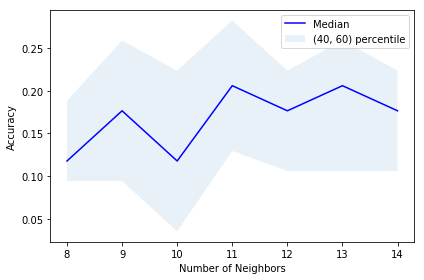

In [174]:
# Number of neighbours
neighs = range(8, 15)

# Store the scores
scores = np.zeros((len(neighs), 3))

# Iterate to find the best model
for idx, neigh in enumerate(neighs):
    model = KNeighborsClassifier(n_neighbors = neigh)
    scores[idx, : ] = cross_validate(model, n_splits = 10)

# Plot the results
plt.plot(neighs, scores[ : , 1], 'b')
plt.fill_between(neighs, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

In [176]:
KNN_model = KNeighborsClassifier(n_neighbors = 11).fit(X, y)

## Decision Tree

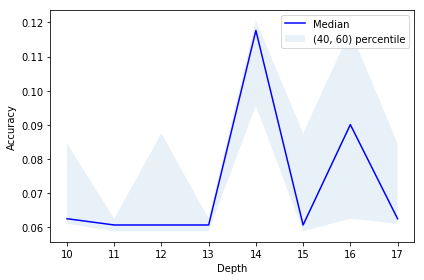

In [177]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Depth of the Secision Trees
depths = range(10, 18)

# Store the scores
scores = np.zeros((len(depths), 3))

# Iterate to find the best model
for idx, depth in enumerate(depths):
    model = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    scores[idx, : ] = cross_validate(model, n_splits = 10)

# Plot the results
plt.plot(depths, scores[ : , 1], 'b')
plt.fill_between(depths, scores[ : , 0], scores[:, 2], alpha = 0.1)
plt.legend(('Median', '(40, 60) percentile'))
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.tight_layout()
plt.show()

In [178]:
Tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 14).fit(X, y)

In [189]:
# Get scores of each model
    
    # predict
yhat1 = KNN_model.predict(X)
yhat2 = Tree_model.predict(X)
    
jaccard_NN= metrics.jaccard_similarity_score(y, yhat1)
logloss_NN = metrics.log_loss(y == 'THEFT', yhat1 == 'THEFT')
    
jaccard_t= metrics.jaccard_similarity_score(y, yhat2)
logloss_t = metrics.log_loss(y == 'THEFT', yhat2 == 'THEFT')




In [202]:
results=[]

scores = {'Jaccard' : jaccard_NN, 'LogLoss' : logloss_NN}
scores['Algorithm'] = "KNN"
results.append(scores)
  
scores = {'Jaccard' : jaccard_t, 'LogLoss' : logloss_t}
scores['Algorithm'] = "Tree"
results.append(scores)

results = pd.DataFrame(results)
results.set_index('Algorithm', inplace = True)

results

,Jaccard,LogLoss
Algorithm,,
KNN,0.401198,1.240934e+01
Tree,1.000000,9.992007e-16
